In [2]:
!pip install sklearn
!pip install matplotlib
!pip install numpy, seaborn, plotly

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Invalid requirement: 'numpy,'


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
df = pd.read_csv('/content/vegetable.csv', sep=';')

In [13]:
df.head() #default 5 rows

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [14]:
df.shape

(7, 2)

In [15]:
df.corr()

,Weight,Price
Weight,1.000000,0.306795
Price,0.306795,1.000000


Text(0.5, 1.0, 'Weight and Price ratio of vegetable')

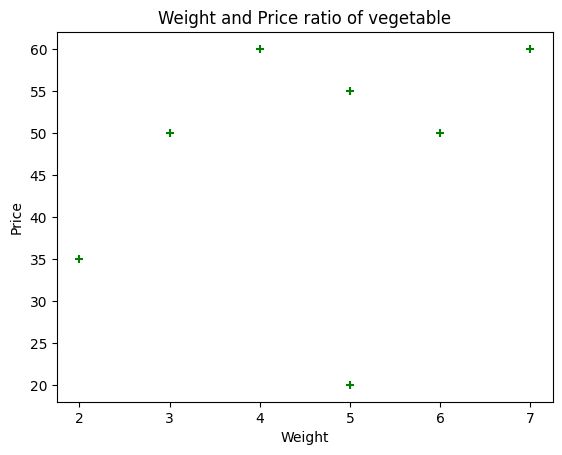

In [19]:
plt.scatter(df['Weight'] , df['Price'], color='green', marker='+')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight and Price ratio of vegetable')

In [20]:
df.describe()

,Weight,Price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


# Raw code

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2) <br>
2. Intercept, c = ȳ - m * x̄

In [21]:
x = df['Weight'] #2D
y = df['Price']

In [22]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [23]:
mean_x

4.571428571428571

In [24]:
mean_y

47.142857142857146

In [25]:
dev_x = x - mean_x
dev_y = y - mean_y

In [26]:
coefficient_m = np.sum(dev_x * dev_y) / np.sum(dev_x **2)
coefficient_m

2.620967741935484

In [27]:
intercept = mean_y - (coefficient_m * mean_x)
intercept

35.16129032258065

In [33]:
independent_x = 6
(coefficient_m * independent_x) + intercept

50.88709677419355

In [34]:
df.head(2)

,Weight,Price
0,2,35
1,4,60


# Sklearn

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
reg = LinearRegression()

In [37]:
reg.fit(df[['Weight']], df[['Price']]) # fit(x,y)

LinearRegression()

In [38]:
reg.coef_

array([[2.62096774]])

In [39]:
coefficient_m

2.620967741935484

In [40]:
reg.intercept_

array([35.16129032])

In [41]:
intercept

35.16129032258065

In [42]:
reg.predict([[6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.88709677]])

In [44]:
(coefficient_m*6) + intercept

50.88709677419355

In [45]:
pred = reg.predict(df[['Weight']])
pred

array([[40.40322581],
       [45.64516129],
       [48.26612903],
       [43.02419355],
       [50.88709677],
       [48.26612903],
       [53.50806452]])

In [46]:
df['pred'] = reg.predict(df[['Weight']])
df.head()

,Weight,Price,pred
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


Text(0.5, 1.0, 'Weight and Price ratio of vegetable')

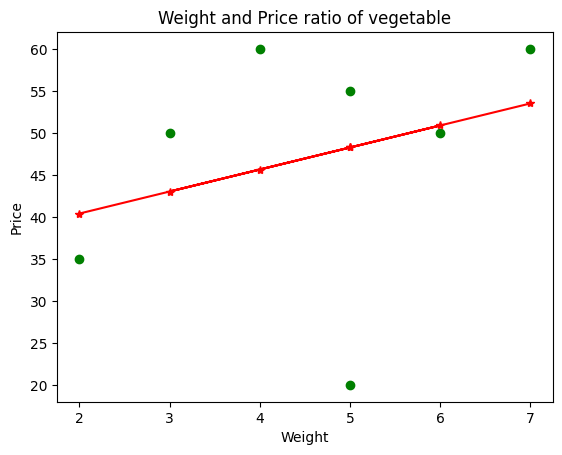

In [48]:
plt.plot(df[['Weight']], reg.predict(df[['Weight']]), marker='*', color='red') #best fit line
plt.scatter(df['Weight'] , df['Price'], color='green', marker='o')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight and Price ratio of vegetable')

Text(0.5, 1.0, 'Weight and Price')

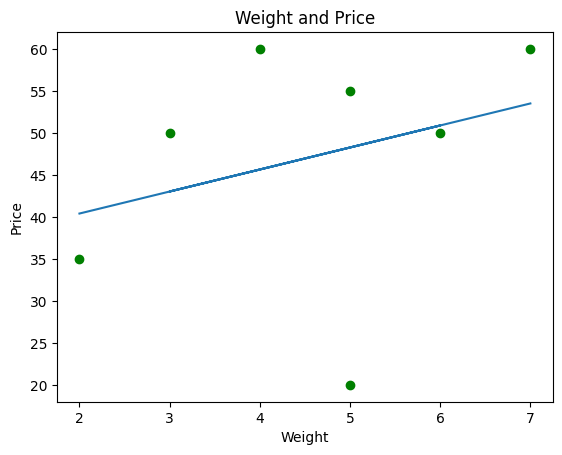

In [49]:
plt.plot(df[['Weight']], df['pred']) #best fit line
plt.scatter(df['Weight'] , df['Price'], color='green', marker='o')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight and Price')

# MSE

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [51]:
mse = mean_squared_error(df['Weight'], df['pred']) # actural y, predicted y
mse

1818.9758064516132

In [52]:
mae = mean_absolute_error(df['Price'], df['pred']) # actural y, predicted y
mae

9.87327188940092